In [13]:
import pandas as pd
import matplotlib.pyplot as plt  # Fix the typo here
import numpy as np
import seaborn as sns
import plotly.express as px

In [7]:

data='Salesstore.csv'
df=pd.read_csv(data)
df.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [3]:
df.tail()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
725,56101,Not Specified,44,5347.13,Regular Air,1886.41,Bill Donatelli,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,GBC Therma-A-Bind 250T Electric Binding System,Small Box
726,1059,Critical,22,127.33,Regular Air,5.30,Sean O'Donnell,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,Wilson Jones 14 Line Acrylic Coated Pressboard...,Small Box
727,1059,Critical,24,990.10,Regular Air,310.22,Sean O'Donnell,Ontario,Corporate,Office Supplies,Binders and Binder Accessories,"Wilson Jones Ledger-Size, Piano-Hinge Binder, ...",Small Box
728,1826,Not Specified,5,28.32,Regular Air,-14.35,Susan Vittorini,Ontario,Corporate,Office Supplies,Paper,Hammermill CopyPlus Copy Paper (20Lb. and 84 B...,Small Box
729,20003,Medium,39,796.08,Regular Air,30.29,Shirley Schmidt,Ontario,Corporate,Technology,Computer Peripherals,Belkin 105-Key Black Keyboard,Small Box


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_ID              730 non-null    int64  
 1   Order_Priority        730 non-null    object 
 2   Order_Quantity        730 non-null    int64  
 3   Sales                 730 non-null    float64
 4   Ship_Mode             730 non-null    object 
 5   Profit                730 non-null    float64
 6   Customer_Name         730 non-null    object 
 7   Region                730 non-null    object 
 8   Customer_Segment      730 non-null    object 
 9   Product_Category      730 non-null    object 
 10  Product_Sub-Category  730 non-null    object 
 11  Product_Name          730 non-null    object 
 12  Product_Container     730 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 74.3+ KB


In [5]:
df.isna().sum()

Order_ID                0
Order_Priority          0
Order_Quantity          0
Sales                   0
Ship_Mode               0
Profit                  0
Customer_Name           0
Region                  0
Customer_Segment        0
Product_Category        0
Product_Sub-Category    0
Product_Name            0
Product_Container       0
dtype: int64

In [6]:
df.describe()

,Order_ID,Order_Quantity,Sales,Profit
count,730.000000,730.000000,730.000000,730.000000
mean,29721.597260,24.857534,1502.777653,207.479233
std,17350.560439,14.182970,2893.936648,878.631028
min,35.000000,1.000000,8.600000,-4437.910000
25%,14479.000000,13.000000,171.098375,-77.132500
50%,29350.500000,25.000000,438.700000,0.035000
75%,44978.500000,37.000000,1480.855000,180.000000
max,59909.000000,50.000000,27663.920000,8417.570000


In [7]:

#what about duplication
df.duplicated().sum()

0

In [8]:
df_cat=df[['Ship_Mode', 'Profit', 'Customer_Name',
           'Region', 'Customer_Segment', 'Product_Category',
           'Product_Sub-Category', 'Product_Name', 'Product_Container']]

In [9]:

df_cat.head()

,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [10]:

#show the number of unique values in categoricat data
for feature in df_cat.columns:
    print(feature,':',df[feature].nunique())

Ship_Mode : 2
Profit : 727
Customer_Name : 173
Region : 6
Customer_Segment : 4
Product_Category : 3
Product_Sub-Category : 15
Product_Name : 445
Product_Container : 3


In [11]:
# groupe the data by product name and sum up the sales by product
product_group=df.groupby(["Product_Name"]).sum()["Sales"]

In [12]:
product_group.head()

Product_Name
#10 Self-Seal White Envelopes                           614.97
#10 White Business Envelopes,4 1/8 x 9 1/2             1558.13
#10- 4 1/8" x 9 1/2" Recycled Envelopes                 700.15
#10- 4 1/8" x 9 1/2" Security-Tint Envelopes             30.83
#10-4 1/8" x 9 1/2" Premium Diagonal Seam Envelopes     672.46
Name: Sales, dtype: float64

In [13]:
#sort the data by sales in descending order
top_selling_products=product_group.sort_values(ascending=False)

In [14]:
top_5_selling_products=pd.DataFrame(top_selling_products.head(5))

In [15]:
top_5_selling_products


,Sales
Product_Name,
Sharp AL-1530CS Digital Copier,49832.5900
Canon PC1060 Personal Laser Copier,39909.2300
Canon imageCLASS 2200 Advanced Copier,31336.8100
2160i,24917.7075
Hoover WindTunnel™ Plus Canister Vacuum,23514.3200


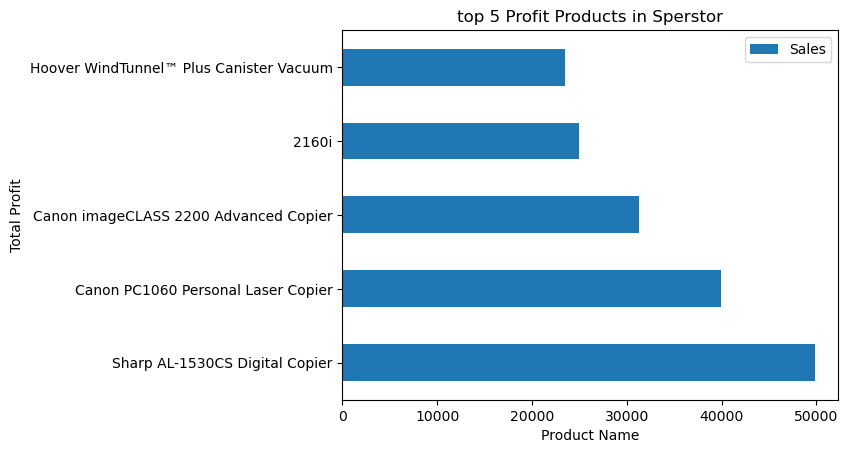

In [29]:
top_5_selling_products.plot(kind="barh")
#add a title to the plot
plt.title("top 5 Profit Products in Sperstor")
#add labels to the x and y axes
plt.xlabel("Product Name")
plt.ylabel("Total Profit")
#Show the plot
plt.show()

In [17]:
#top-profitable produccts?
top_selling_products=product_group.sort_values(ascending=False)
top_5_selling_products=pd.DataFrame(top_selling_products.head(5))
top_5_selling_products
product_group=df.groupby(["Product_Name"]).sum()["Profit"]
top_profit_products=product_group.sort_values(ascending=False)
top_5_profit_products=pd.DataFrame(top_selling_products.head(5))
top_5_profit_products

,Sales
Product_Name,
Sharp AL-1530CS Digital Copier,49832.5900
Canon PC1060 Personal Laser Copier,39909.2300
Canon imageCLASS 2200 Advanced Copier,31336.8100
2160i,24917.7075
Hoover WindTunnel™ Plus Canister Vacuum,23514.3200


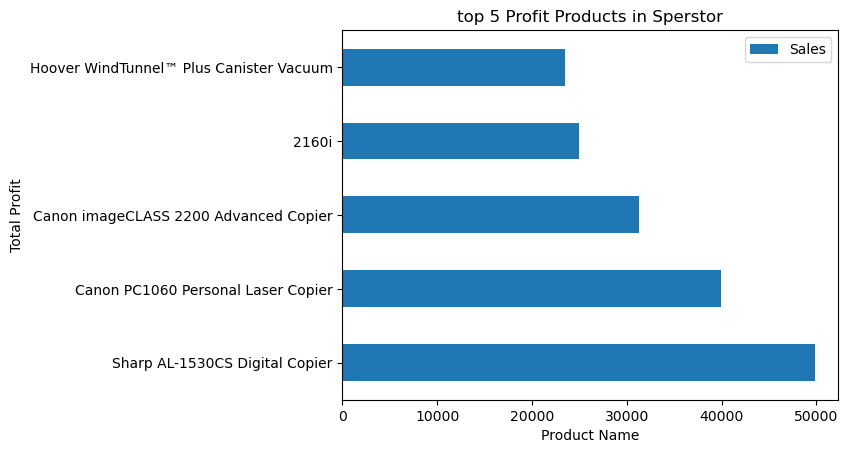

In [28]:
top_5_selling_products.plot(kind="barh")
#add a title to the plot
plt.title("top 5 Profit Products in Sperstor")
#add labels to the x and y axes
plt.xlabel("Product Name")
plt.ylabel("Total Profit")
#Show the plot
plt.show()

In [19]:
df.Region.value_counts()

Region
West                     232
Atlantic                 170
Northwest Territories    150
Prarie                    79
Ontario                   67
Nunavut                   32
Name: count, dtype: int64

RÃ©gion avec le plus de vent pour le produit 'Canon MP41DH Printing Calculator': Northwest Territories


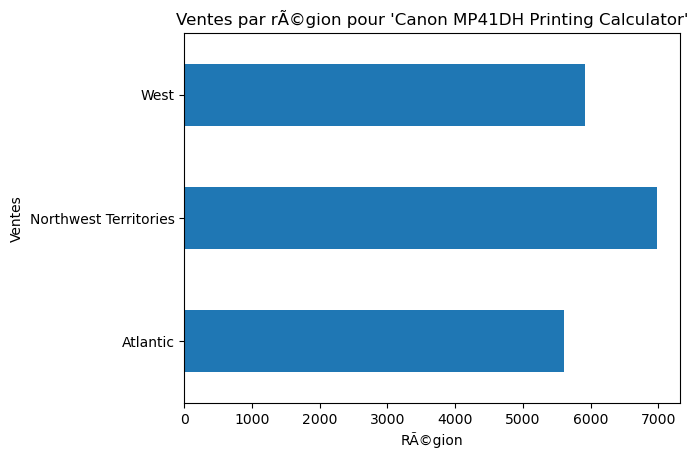

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df soit votre DataFrame contenant les donnÃ©es

# Convertir les colonnes 'Sales' et 'Profit' en numÃ©rique, en remplaÃ§ant 'Medium' par NaN
df['Sales'] = pd.to_numeric(df['Sales'].replace('Medium', pd.NA), errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'].replace('Medium', pd.NA), errors='coerce')

# Filtrer les donnÃ©es pour inclure uniquement le Canon MP41DH Printing Calculator
product = df[df["Product_Name"] == "Canon MP41DH Printing Calculator"]

# Grouper les donnÃ©es par rÃ©gion et calculer la somme des ventes
region_sales = product.groupby(["Region"])["Sales"].sum()

# Trouver la rÃ©gion avec le plus de vent
region_max_sales = region_sales.idxmax()

# Afficher la rÃ©gion avec le plus de vent
print(f"RÃ©gion avec le plus de vent pour le produit 'Canon MP41DH Printing Calculator': {region_max_sales}")

# Tracer le graphique des ventes par rÃ©gion
region_sales.plot(kind="barh", title="Ventes par rÃ©gion pour 'Canon MP41DH Printing Calculator'")
plt.xlabel("RÃ©gion")
plt.ylabel("Ventes")
plt.show()

RÃ©gion avec le plus de vent pour le produit 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind': Northwest Territories


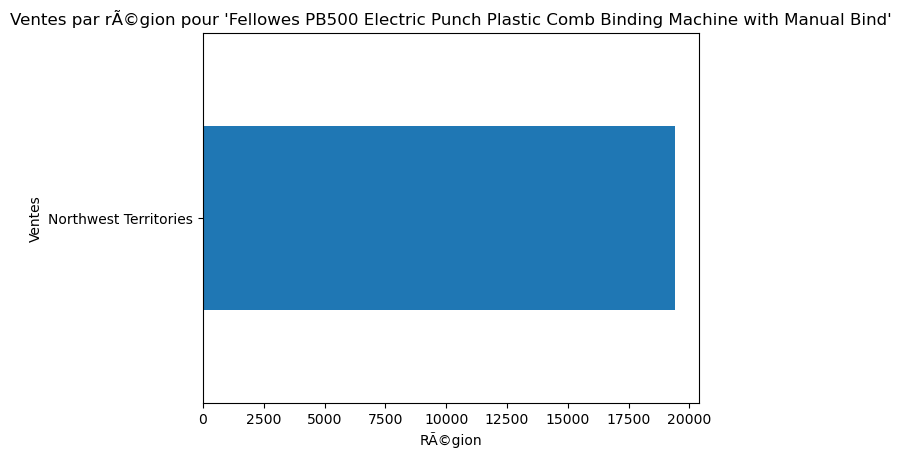

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df soit votre DataFrame contenant les donnÃ©es

# Convertir les colonnes 'Sales' et 'Profit' en numÃ©rique, en remplaÃ§ant 'Medium' par NaN
df['Sales'] = pd.to_numeric(df['Sales'].replace('Medium', pd.NA), errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'].replace('Medium', pd.NA), errors='coerce')

# Filtrer les donnÃ©es pour inclure uniquement le Canon MP41DH Printing Calculator
product = df[df["Product_Name"] == "Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind"]

# Grouper les donnÃ©es par rÃ©gion et calculer la somme des ventes
region_sales = product.groupby(["Region"])["Sales"].sum()

# Trouver la rÃ©gion avec le plus de vent
region_max_sales = region_sales.idxmax()

# Afficher la rÃ©gion avec le plus de vent
print(f"RÃ©gion avec le plus de vent pour le produit 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind': {region_max_sales}")

# Tracer le graphique des ventes par rÃ©gion
region_sales.plot(kind="barh", title="Ventes par rÃ©gion pour 'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind'")
plt.xlabel("RÃ©gion")
plt.ylabel("Ventes")
plt.show()

RÃ©gion avec le plus de vent pour le produit 'Sharp AL-1530CS Digital Copier': West


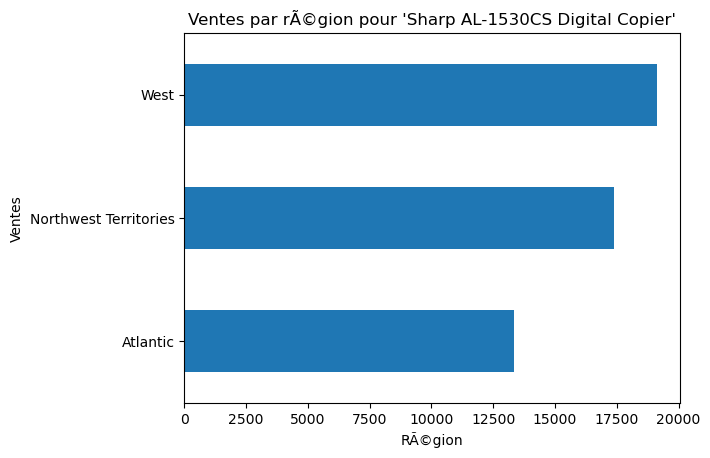

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Supposons que df soit votre DataFrame contenant les donnÃ©es

# Convertir les colonnes 'Sales' et 'Profit' en numÃ©rique, en remplaÃ§ant 'Medium' par NaN
df['Sales'] = pd.to_numeric(df['Sales'].replace('Medium', pd.NA), errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'].replace('Medium', pd.NA), errors='coerce')

# Filtrer les donnÃ©es pour inclure uniquement le Canon MP41DH Printing Calculator
product = df[df["Product_Name"] == "Sharp AL-1530CS Digital Copier"]

# Grouper les donnÃ©es par rÃ©gion et calculer la somme des ventes
region_sales = product.groupby(["Region"])["Sales"].sum()

# Trouver la rÃ©gion avec le plus de vent
region_max_sales = region_sales.idxmax()

# Afficher la rÃ©gion avec le plus de vent
print(f"RÃ©gion avec le plus de vent pour le produit 'Sharp AL-1530CS Digital Copier': {region_max_sales}")

# Tracer le graphique des ventes par rÃ©gion
region_sales.plot(kind="barh", title="Ventes par rÃ©gion pour 'Sharp AL-1530CS Digital Copier'")
plt.xlabel("RÃ©gion")
plt.ylabel("Ventes")
plt.show()


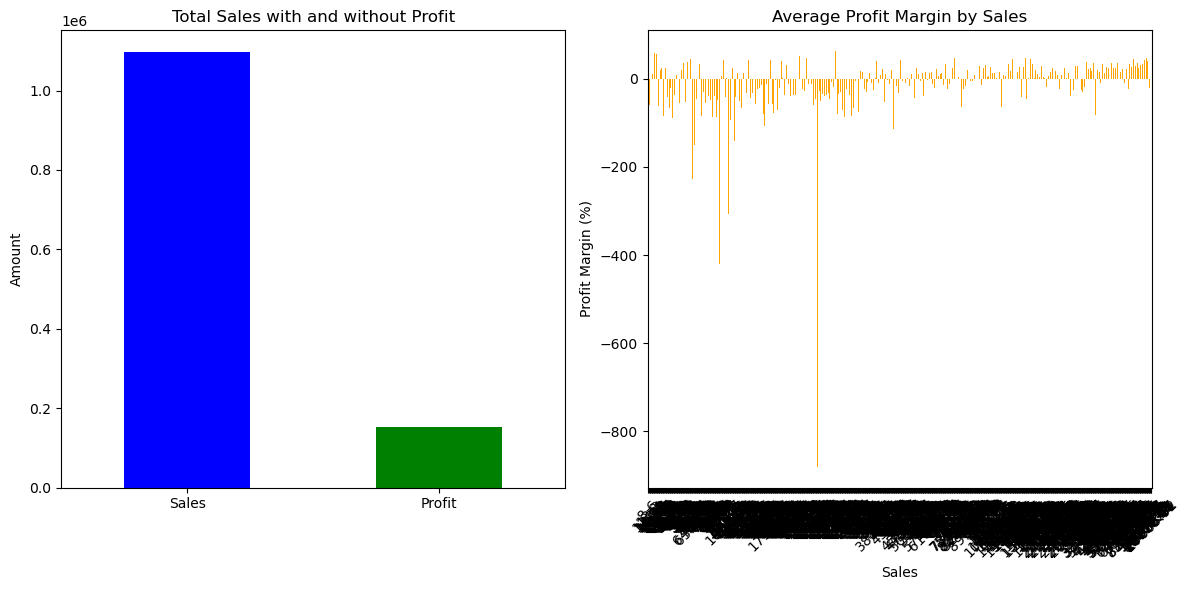

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace 'your_data.csv' with your actual file path or data source)
df = pd.read_csv('Salesstore.csv')

# Display the first few rows of the DataFrame to inspect the data
df.head()

# Convert relevant columns to numeric
columns_to_convert = ['Sales', 'Profit']
for col in columns_to_convert:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"Column '{col}' not found in DataFrame.")

# Calculate profit margin (profit as a percentage of sales)
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

# Visualize the impact of profit margin on sales
plt.figure(figsize=(12, 6))

# Bar chart for total sales with and without profit
plt.subplot(1, 2, 1)
df[['Sales', 'Profit']].sum().plot(kind='bar', rot=0, color=['blue', 'green'])
plt.title('Total Sales with and without Profit')
plt.ylabel('Amount')

# Bar chart for profit margin
plt.subplot(1, 2, 2)
df.groupby('Sales')['Profit_Margin'].mean().plot(kind='bar', rot=45, color='orange')
plt.title('Average Profit Margin by Sales')
plt.ylabel('Profit Margin (%)')

plt.tight_layout()
plt.show()

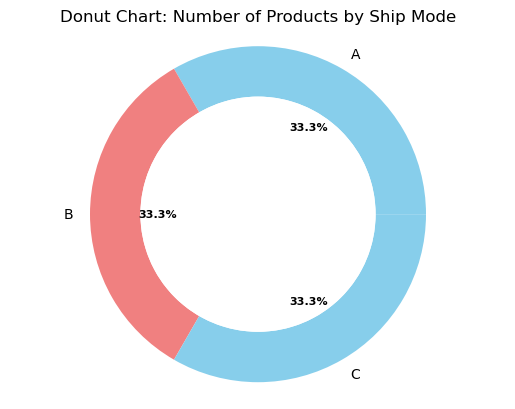

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {'Product_Category': ['A', 'B', 'C', 'A', 'B', 'C'],
        'Ship_Mode': ['Standard', 'Express', 'Standard', 'Express', 'Standard', 'Express']}
df = pd.DataFrame(data)

# Group by Product_Category and Ship_Mode and count the occurrences
grouped_data = df.groupby(['Product_Category', 'Ship_Mode']).size().reset_index(name='Count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='Product_Category', columns='Ship_Mode', values='Count').fillna(0)

# Plotting a donut chart
fig, ax = plt.subplots()
colors = ['skyblue', 'lightcoral']
wedges, texts, autotexts = ax.pie(pivot_data['Express'], labels=pivot_data.index, autopct='%1.1f%%',
                                  wedgeprops=dict(width=0.3), colors=colors)
plt.setp(autotexts, size=8, weight="bold")

# Draw a circle in the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
plt.title('Donut Chart: Number of Products by Ship Mode')
plt.show()

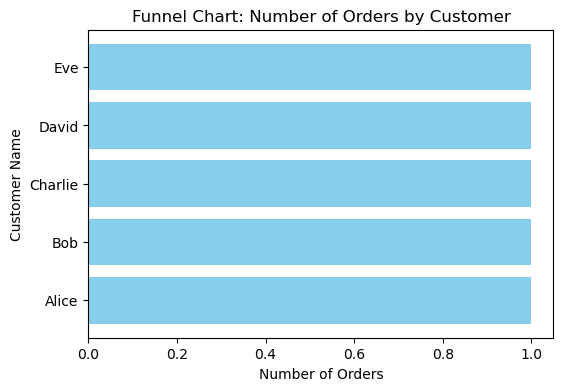

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {'Order_ID': [1, 2, 3, 4, 5],
        'Customer_Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve']}
df = pd.DataFrame(data)

# Count the number of orders for each customer
customer_order_count = df['Customer_Name'].value_counts().reset_index()
customer_order_count.columns = ['Customer_Name', 'Order_Count']

# Sort the DataFrame by Order_Count in descending order
customer_order_count = customer_order_count.sort_values(by='Order_Count', ascending=False)

# Plotting the funnel chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.barh(customer_order_count['Customer_Name'], customer_order_count['Order_Count'], color='skyblue')

# Adding labels and title
plt.xlabel('Number of Orders')
plt.ylabel('Customer Name')
plt.title('Funnel Chart: Number of Orders by Customer')

plt.show()

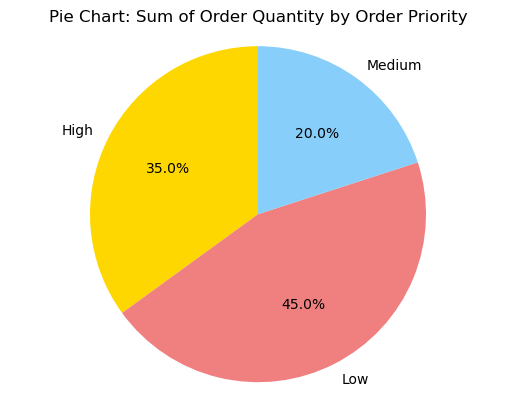

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {'Order_Quantity': [10, 20, 15, 25, 30],
        'Order_Priority': ['High', 'Medium', 'Low', 'High', 'Low']}
df = pd.DataFrame(data)

# Group by Order_Priority and calculate the sum of Order_Quantity
priority_order_quantity = df.groupby('Order_Priority')['Order_Quantity'].sum().reset_index()

# Plotting the pie chart
fig, ax = plt.subplots()
ax.pie(priority_order_quantity['Order_Quantity'], labels=priority_order_quantity['Order_Priority'],
       autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue'])

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Adding a title
plt.title('Pie Chart: Sum of Order Quantity by Order Priority')

plt.show()

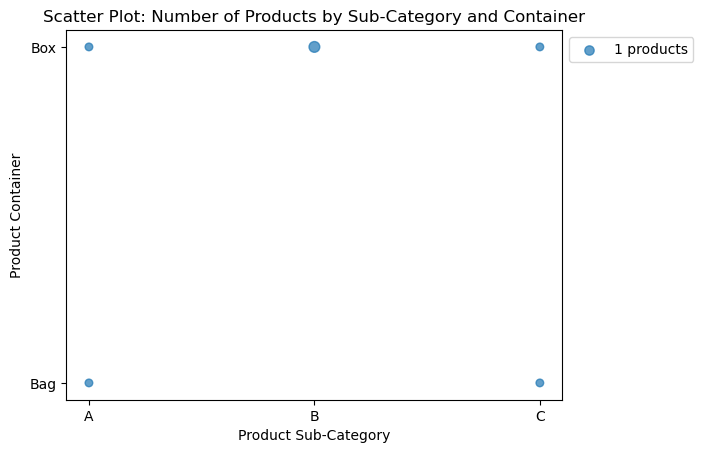

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {'Product_Sub_Category': ['A', 'B', 'C', 'A', 'B', 'C'],
        'Product_Container': ['Box', 'Box', 'Bag', 'Bag', 'Box', 'Box']}
df = pd.DataFrame(data)

# Calculate the count of products for each combination of Product_Sub_Category and Product_Container
product_counts = df.groupby(['Product_Sub_Category', 'Product_Container']).size().reset_index(name='Count')

# Scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter(product_counts['Product_Sub_Category'], product_counts['Product_Container'], s=product_counts['Count']*30, alpha=0.7)

# Adding labels and title
plt.xlabel('Product Sub-Category')
plt.ylabel('Product Container')
plt.title('Scatter Plot: Number of Products by Sub-Category and Container')

# Adding a legend for the size of the points
legend_labels = [f'{count} products' for count in product_counts['Count']]
legend = ax.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()